In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

In [3]:
# splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
X_train[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
y_train[:10]

array(['5', '4', '8', '0', '2', '6', '5', '4', '8', '3'], dtype=object)

Training the dataset on KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn.predict(X_test)
result = np.column_stack((y_test,y_pred))
result[:10]

array([['8', '8'],
       ['4', '4'],
       ['8', '8'],
       ['7', '7'],
       ['7', '7'],
       ['0', '0'],
       ['6', '6'],
       ['2', '2'],
       ['7', '7'],
       ['4', '4']], dtype=object)

0.9700714285714286
[[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    1    0    3    0    1]
 [   7   17 1323    1    4    1    5   17    3    2]
 [   0    2   12 1384    1    8    2    7    7   10]
 [   3    8    1    0 1251    0    2    3    1   26]
 [   2    5    0   16    2 1232   13    0    1    2]
 [   5    1    0    0    5    6 1379    0    0    0]
 [   1   21    4    0    4    0    0 1458    1   14]
 [   4   13    6   22    2   19    4   10 1267   10]
 [   6    5    2   11   19    0    0   17    1 1359]]


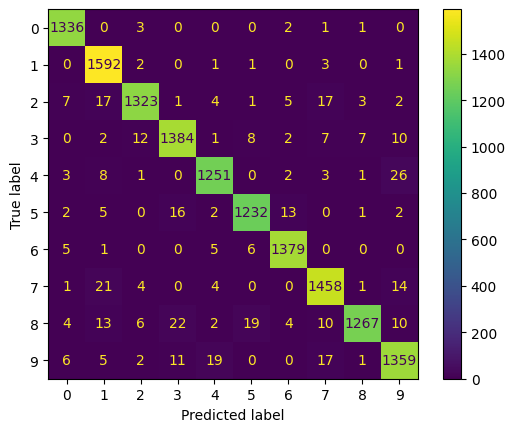

In [8]:
# Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9713392857142857


In [9]:
# After Tuning the classifier
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9728571428571429


So after Tuning the model, the accuracy of model increase by 0.002, so we can get maximium accuracy from K Nearest Algorithm.